In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\3 Stars Laptop\AppData\Local\Temp\ipykernel_25172\2583278296.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
# Load the dataset
data = pd.read_csv('bank-additional-full.csv', delimiter=';')


In [4]:
# Data Analysis
# Attribute types and preprocessing
ordinal_features = ['education']
nominal_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
binary_features = ['default', 'housing', 'loan', 'y']
discrete_features = ['age', 'campaign', 'pdays', 'previous']
continuous_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [5]:
# Data Cleaning
# Handle missing data
imputer = SimpleImputer(strategy='median')
data['pdays'] = imputer.fit_transform(data[['pdays']])


In [6]:
# Data Transformation
# One-Hot Encoding for nominal features
data = pd.get_dummies(data, columns=nominal_features, drop_first=True)

# Label Encoding for ordinal feature
label_encoder = LabelEncoder()
data['education'] = label_encoder.fit_transform(data['education'])

# Standardization for continuous features
scaler = StandardScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])


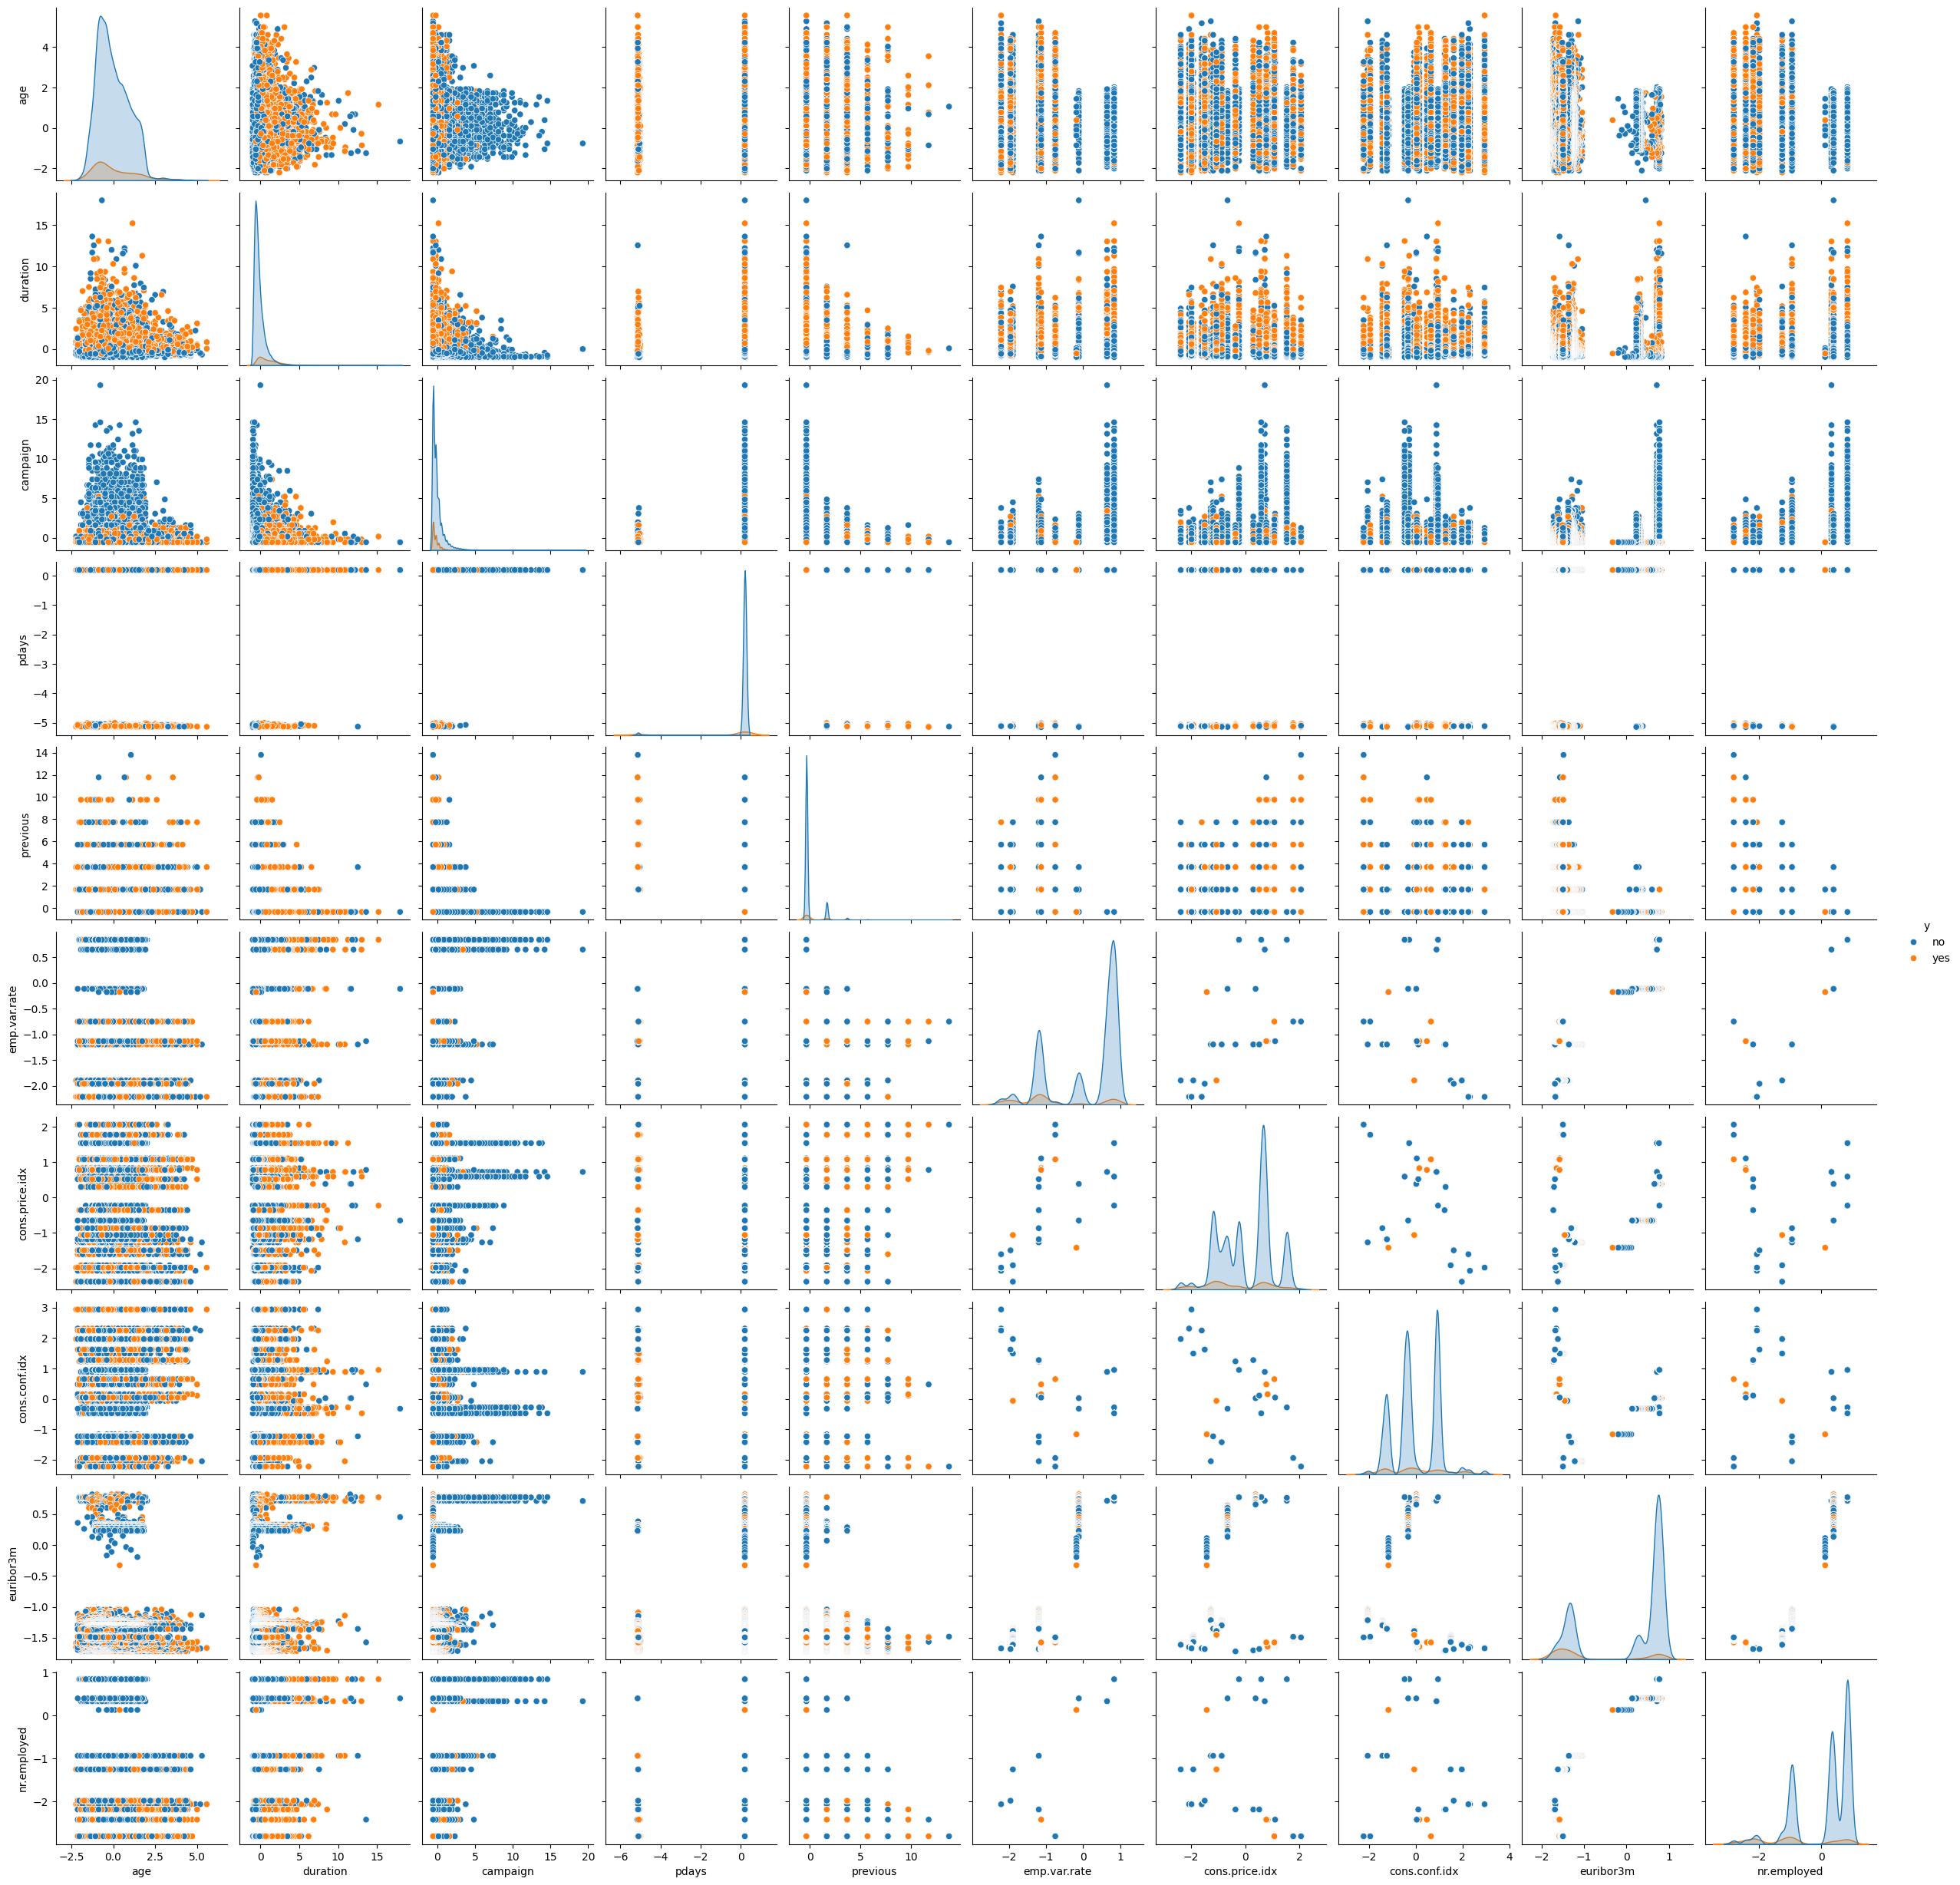

In [7]:
# Data Visualization
# EDA
# It will take some time to load approx 5 mins because the dataset is large
sns.pairplot(data[continuous_features + ['y']], hue='y', diag_kind='kde')
plt.show()


In [8]:
# Classification
# Split the data into features and target variable
X = data.drop('y', axis=1)
y = data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Initialize classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
}


In [10]:
# Train and evaluate models
for name, classifier in classifiers.items():
    print(f"Training {name}...")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Evaluation
    print(f"\nResults for {name}:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("="*60)


Training KNN...

Results for KNN:
Confusion Matrix:
[[7018  285]
 [ 521  414]]

Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.96      0.95      7303
         yes       0.59      0.44      0.51       935

    accuracy                           0.90      8238
   macro avg       0.76      0.70      0.73      8238
weighted avg       0.89      0.90      0.90      8238

Training SVM...

Results for SVM:
Confusion Matrix:
[[7144  159]
 [ 591  344]]

Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7303
         yes       0.68      0.37      0.48       935

    accuracy                           0.91      8238
   macro avg       0.80      0.67      0.71      8238
weighted avg       0.90      0.91      0.90      8238

Training Naive Bayes...

Results for Naive Bayes:
Confusion Matrix:
[[6355  948]
 [ 366  569]]

Classification Report:
              precisi